<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/6_PCA_performance_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
Last amended: 25th June, 2021
Myfolder: /home/ashok/Documents/10.higgsBoson

Create a virtual environment for Conda with essential packages:
conda create -n sklearn
             -c anaconda
             -c conda-forge
              python=3.7.6 scikit-learn=0.23.2 pandas ipython numpy spyder imbalanced-learn matplotlib

Objectives:
              i)  Quick modeling with multiple models
             ii)  Learn performance measures: precision, recall and F1 scores
            iii)  ROC curve and AUC
             iv)  Precision and recall curve

"""


In [1]:
# 0.0
# Upgrade current sklearn
! pip install -U scikit_learn

     |████████████████████████████████| 22.3MB 36.0MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
# 0.1
import sklearn
sklearn.__version__   # 0.24.2

'0.24.2'

## Libraries

### Call libraries

In [3]:
# Import libraries
# 1.0
# %reset -f

# 1.1
import pandas as pd
import numpy as np

# 1.2 For generating/importing datasets
from sklearn.datasets import make_classification
from sklearn.datasets import load_digits

# 1.3 For data splitting
from sklearn.model_selection import train_test_split

# 1.4 For data standardization
from sklearn.preprocessing import StandardScaler

# 1.5 For noise removal and dimensionality reduction
from sklearn.decomposition import PCA

# 1.6 For pipelining
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as mp

# 1.7 For modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,SVMSMOTE

# 1.8 For performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

# 1.9 Plotting metrics related graphs
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# 1.10 Misc
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os

In [4]:
# 1.11 Display multiple commands out put from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Understanding PCA
Unsupervised learning method for dimensionality reduction. <br>


#### Variance vs Entropy
Is there a relationship between the two? <br>
See [here](https://www.quora.com/Which-is-the-best-measure-of-uncertainty-variance-or-entropy-or-are-they-both-equivalent) for Which is the best measure of uncertainty, variance or entropy, or are they both equivalent?

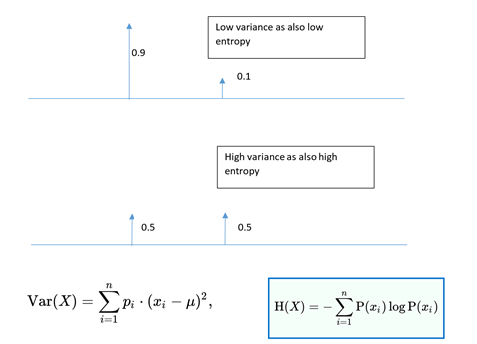

In a dataset, PCA assumes that the directions with the largest variances are the most “important” (i.e, the most principal). For example, the dimensionality of our two-dimensional data can be reduced to a single dimension by projecting each sample onto the first principal component (See below)

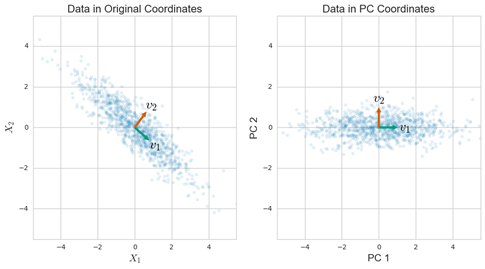

Principal components are new derived features that are constructed as <u>linear transformations</u> of the original features. These transformations are carried out in such a way that the new features (i.e., principal components) are <b>uncorrelated</b> and most of the information within the original features is squeezed or compressed into the first components. So, the idea is that a 10-dimensional data gives you 10-principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on.   

Organizing information in principal components this way, will allow you to reduce dimensionality without losing much information, and this by discarding the components with low information and considering the remaining components as your new variables. See figure below:

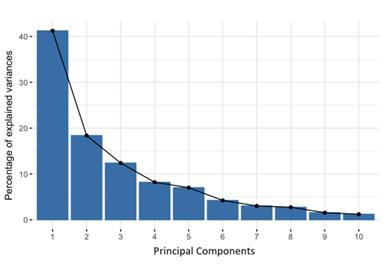

An important thing to realize here is that, <b>the principal components are less interpretable</b> and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible.

Note that, the PCA method is particularly useful when the variables within the data set are <b>highly correlated</b>. Correlation indicates that there is redundancy in the data. Due to this redundancy, PCA can be used to reduce the original variables into a smaller number of new variables ( = principal components) explaining most of the variance in the original variables. In the following figure such correlation is absent.

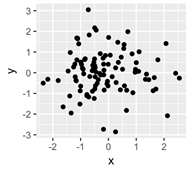

#### Simple experiment with mnist digits

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels. The MNIST database contains 60,000 training images and 10,000 testing images.

In [ ]:
# 3.0 Get images of handwritten digits and the corresponding symbols:
X,y = load_digits(return_X_y= True)

# 3.1
X.shape  # (1797, 64)
         # Images:        1797
         # Pixels/row:      64
         # Img size:     8 X 8

# 3.2 Digits corresponding to
#     Ist twelve rows
print()
y[:12]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

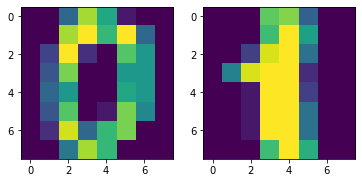

In [ ]:
# 3.3 Plot first two digits:

fig = plt.figure()

# 3.3.1 
ax1 = fig.add_subplot(1,2,1)
_=imshow(X[0].reshape(8,8))

# 3.3.2
ax1 = fig.add_subplot(1,2,2)
_=imshow(X[1].reshape(8,8))

Modeling using PCA  
Steps:  

> Split data into train/test  
> Create a pipeline  
>> pipe==>  <i>train data-> Standardize->PCA->RF Classifier</i><br>
>> `pipe.fit(train-data)`<br>
>> Make predictions `pipe.predict()`  <br>

> Get accuracy<br>

In [ ]:
# 4.0 Split data
X_train,X_test,y_train,y_test = train_test_split(
                                                  X,
                                                  y,
                                                  test_size = 0.3
                                                 )

# 4.1 Develop pipeline of operations 
#     and modeling without PCA and with PCA

pipe1 = make_pipeline(
                     StandardScaler(),
                     RandomForestClassifier()
                     )

# 4.1.1 Pipeline with PCA

pipe2 = make_pipeline(
                     StandardScaler(),
                     PCA(n_components=0.95),   # Get as many components that explain
                                               # upto 95% of total variance
                     RandomForestClassifier()
                     )

# 4.2 Train the two pipes:
_=pipe1.fit(X_train,y_train)
_=pipe2.fit(X_train,y_train)

# 4.3 MAke predictions in the two cases
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)

# 4.4 Check accuracy in the two cases
print("\n\n---Accuracy----")
np.sum(y_test == y_pred1)/len(y_test) 
print()
np.sum(y_test == y_pred2)/len(y_test)

# 4.5
print("\n\n--Our Data dimension?--")
X_train.shape[1]

print("\n\n--How many PCA components--")
print("--Our new data dimension?--")
pipe2[1].n_components_   # 40



---Accuracy----


0.9666666666666667

0.9592592592592593



--Our Data dimension?--


64



--How many PCA components--
--Our new data dimension?--


39

Explained variance  
The fraction of `variance explained` by a principal component is the ratio between the variance of that principal component and the total variance, ie:

`Explained variance of` PC<sub>k</sub> = `(Variance of Pr.Comp k)/(Total variance of data)`



For several principal components, add up their individual variances and divide by the total variance. In the case of mnist dataset, we will 
1. plot explained variance, principal component-wise.
2. plot cumulative explained variance

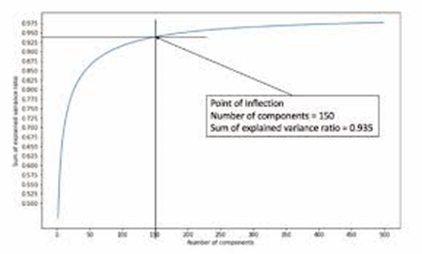

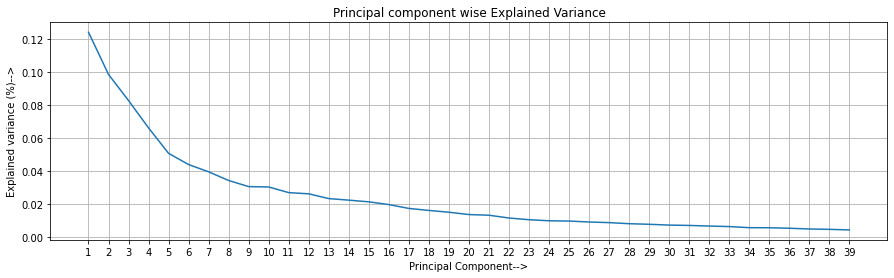

In [ ]:
# 5.0 How much variance is explained
#     by each one of the 40 Pr Comps?

# 5.0.1
exp_var = pipe2[1].explained_variance_ratio_

# 5.0.2
fig = plt.figure(figsize = (15,4))
_=plt.plot(range(1,len(exp_var) + 1), exp_var)
_=plt.xlabel("Principal Component-->")
_=plt.ylabel("Explained variance (%)-->")
_=plt.title("Principal component wise Explained Variance")
_=plt.xticks(range(1,len(exp_var)+1))
plt.grid()

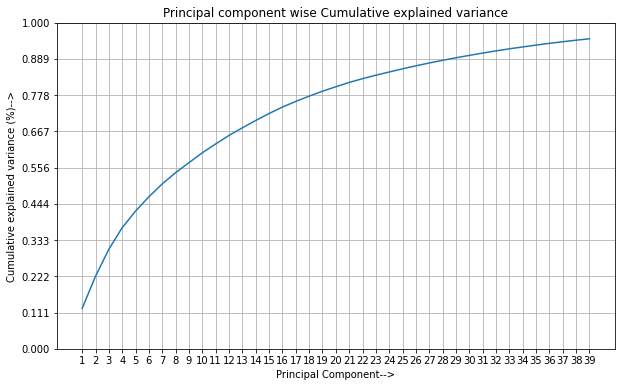

In [ ]:
# 5.1 Graph of cumulative variance explained as we progress
#      from one component to other:

exp_var = np.cumsum(
                    pipe2[1].explained_variance_ratio_
                    )

# 5.2
fig = plt.figure(figsize = (10,6))
_=plt.plot(range(1,len(exp_var) + 1), exp_var)
_=plt.xlabel("Principal Component-->")
_=plt.ylabel("Cumulative explained variance (%)-->")
_=plt.title("Principal component wise Cumulative explained variance")
_=plt.xticks(range(1,len(exp_var) + 1) )
_=plt.yticks(np.linspace (0, 1.0, 10) )
plt.grid()

##Generate and split data
Another dataset

In [5]:
# 6.0 Generate arrays of data for classification:
#    See examples here: https://towardsdatascience.com/https-medium-com-faizanahemad-generating-synthetic-classification-data-using-scikit-1590c1632922

X,y = make_classification(
                           n_samples=10000,
                           n_features=100,
                           n_informative= 80,     # Relevant features
                           n_redundant=15,        # These features are linear combination of some features
                           n_repeated =5,         # How many duplicate features
                           scale = None,          # None implies, multiply features by some random value 
                           weights=[0.99, 0.01],  # Makes data imbalanced
                           class_sep = 1.5,       # Less it is more difficult class separation
                                                  # Value of 0.75 may make hard-decision boundary
                           flip_y = 0.01          # Flip randomly 1% of class labels
                         )

# 6.0.1
X.shape               # (10000, 100)
print()
y[:8]
print()
np.sum(y)/len(y)      # 0.0157, Dataset is imbalanced 


(10000, 100)

array([0, 0, 0, 0, 0, 0, 0, 0])

0.0164

In [6]:
# 6.1 Split, shuffle and perform stratified sampling:

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


# 6.1.1
X_train.shape # (7000, 100)
X_test.shape  # (3000, 100)

(7000, 100)

(3000, 100)

In [7]:
# 6.2 Perform PCA to remove noisy columns from data:

pipe = make_pipeline(
                      StandardScaler(),      # This is a must before PCA
                      PCA(n_components=0.95)
                    )


# 6.2.1 Get PCA output
X_new = pipe.fit_transform(X_train)
X_new.shape   # (7000, 62)                   

(7000, 61)

In [8]:
# 6.3 Examine correlation within each pair of principal components.
#     For the purposes of nice printing, make a DataFrame:

pd.DataFrame(                                                # 
              np.round(                                      # Round up to two decimal pts
                         np.corrcoef(X_new, rowvar=False),   # Array of pairwise correlations
                         2
                      )
            )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,1.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
1,0.0,1.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
2,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,-0.0,0.0,0.0,1.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
4,0.0,0.0,-0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,1.0,0.0,-0.0,0.0,-0.0
57,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0
58,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0
59,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0


## Gradient Boosting classifier

Gradient Boosting is a technique of producing an additive predictive model by combining various weak predictors, typically Decision Trees. Gradient Boosting Trees can be used for both regression and classification. Here, we will use a binary outcome model to understand the working of GBT.

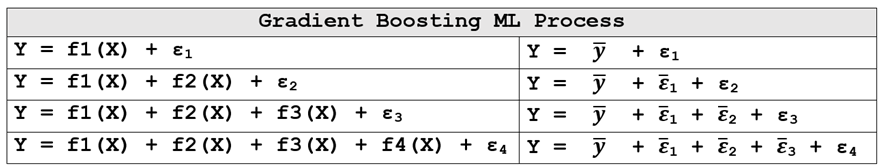





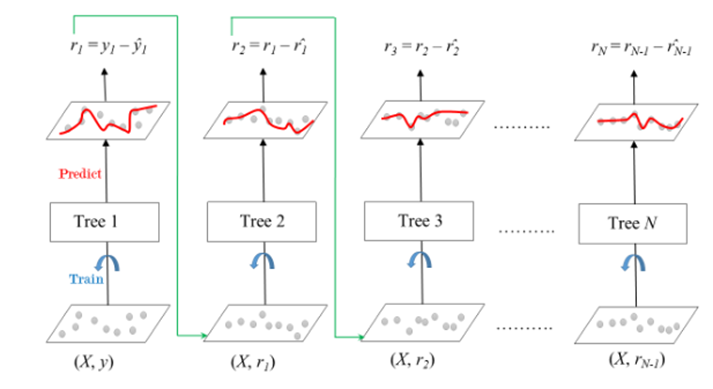

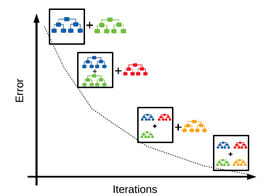

Shrinkage refers to the fact that the prediction of each tree in the ensemble is shrunk after it is multiplied by the learning rate (`eta`) which ranges between 0 to 1. There is a trade-off between `eta` and number of estimators, decreasing learning rate needs to be compensated with increasing estimators in order to reach certain model performance. Since all trees are trained now, predictions can be made. Each tree predicts a label and final prediction is given by the formula:  

`y(pred) = y1 + (eta *  r1) + (eta * r2) + ....... + (eta * rN)`


Disadvantages:

>	This method is sensitive to outliers. Outliers will have much larger residuals than non-outliers, so gradient boosting will focus a disproportionate amount of its attention on those points. Using Mean Absolute Error (MAE) to calculate the error instead of Mean Square Error (MSE) can help reduce the effect of these outliers since the latter gives more weights to larger differences. The parameter `criterion` helps you choose this function.

>	It is prone to overfit if number of trees is too large. The parameter `n_estimators` can help determining a good point to stop before our model starts overfitting

>	Computation can take a long time. Hence, if you are working with a large dataset, always keep in mind to take a sample of the dataset (keeping odds ratio for target variable same) while training the model.


## GBM vs RF classifiers

In [10]:
# 7.0 Create a pipeline with GBM classifier:

pipe3 = make_pipeline(
                      StandardScaler(),
                      PCA(n_components = 0.95),
                      GradientBoostingClassifier(
                                                 learning_rate = 0.1,
                                                 n_estimators = 50,  # Rather a small value. Test with 500
                                                )
                      )


# 7.1 Train and make predictions
pipe3.fit(X_train,y_train)
y_pred_gbm= pipe3.predict(X_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_estimators=50))])

In [11]:
# 7.2 Same dataset. Make a pipeline with RF classifier:

pipe4 = make_pipeline(
                      StandardScaler(),
                      PCA(n_components = 0.95),
                      RandomForestClassifier(
                                                 n_estimators = 50 # Try 500 does not help
                                              )
                    )


# 7.3 Train and predict:
 
pipe4.fit(X_train,y_train)
y_pred_rf = pipe4.predict(X_test)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=50))])

## Evaluation
Evaluating model performance

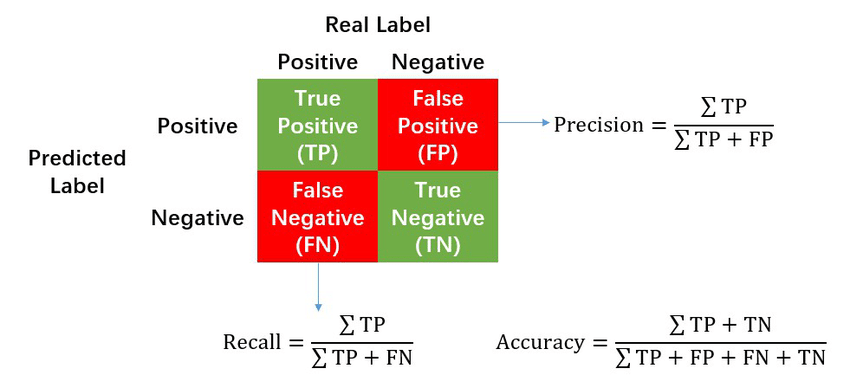

Very high accuracy and very high precision but very poor recall:

```

                             Actual
                         1              0
                      -----------------------
                   1 |   1              0
Predicted            |
                   0 |   10           998 

```

#### Accuracy Score

In [12]:
# 8.0 Accuracy scores

print("--gbm accuracy score--")
accuracy_score(y_test,
               y_pred_gbm,
              )     


# 8.1

print("\n\n--rf accuracy score--")
accuracy_score(y_test,
               y_pred_rf 
             )     



--gbm accuracy score--


0.9776666666666667



--rf accuracy score--


0.984

#### Recall

In [13]:
# 9.0 Recall scores

print("--gbm recall score--")
recall_score(y_test,
             y_pred_gbm,
             pos_label = 1     # Change it to 0
             )     


# 9.1

print("\n\n--rf recall score--")
recall_score(y_test,
             y_pred_rf,
             pos_label = 1     # Change it to 0
             )     



--gbm recall score--


0.10204081632653061



--rf recall score--


0.02040816326530612

#### Precision

In [14]:
# 9.2 Precision scores:
print("--gbm precision score--")
precision_score(
                y_test,
                y_pred_gbm,
                pos_label = 1   # Change it to 0
                )  


# 9.3
print("\n\n--rf precision score--")
precision_score(
                y_test,
                y_pred_rf,
                pos_label = 1    # Change it to 0
                )  



--gbm precision score--


0.17857142857142858



--rf precision score--


1.0

####Confusion Matrix

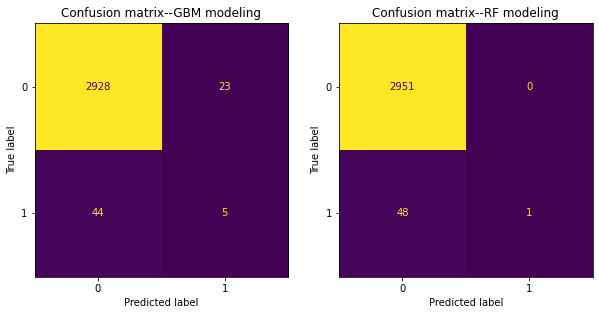

In [15]:
# 10.0 Plot confusion matrix in each case:
fig,ax = plt.subplots(1,2, figsize = (10,10))
_=plot_confusion_matrix(
                         pipe3,
                         X_test,
                         y_test,
                         values_format="",
                         colorbar = False,
                         ax = ax[0]
                        )


# 10.1
_=plot_confusion_matrix(
                         pipe4,
                         X_test,
                         y_test,
                         values_format = "",
                         colorbar = False,
                         ax = ax[1]
                       )

# 10.2
_=ax[0].set_title("Confusion matrix--GBM modeling")
_=ax[1].set_title("Confusion matrix--RF modeling")

#### F1 score


F1 score is a way of combining recall and precision in one metric. It is a harmonic mean of recall and precision.

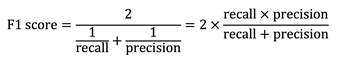

For a general definition of F<sub>b</sub> score, see this [link](https://deepai.org/machine-learning-glossary-and-terms/f-score). F<sub>b</sub> implies you want recall to be more important than precision by a factor of `b`. We calculate F<sub>2</sub> score when we want recall to be twice as important as precision.

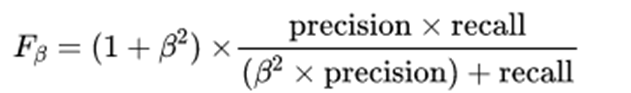

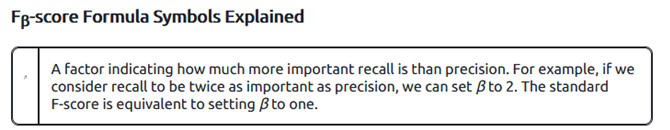

In [16]:
# 10.0
print("--gbm f1 score--")
f1_score(
          y_test,
          y_pred_gbm,
          pos_label =1
         )  


# 10.1
print("\n\n--rf f1 score--")
f1_score(
          y_test,
          y_pred_rf,
          pos_label =1
         )
         

--gbm f1 score--


0.12987012987012986



--rf f1 score--


0.039999999999999994

#### ROC curve
Area under curve (AUC)

A model is good if the predicted probability is around 0.9 then most of the time actual vales are also 1. Or when the predicted probabilities are 0.3 most of the actual values are around 0. Here is a sample of behaviour of one model.

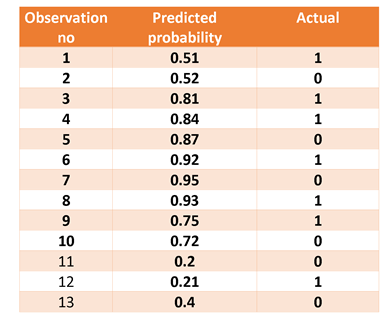

A receiver operating characteristic curve, or ROC curve, is a graphical plot that illustrates the performance charteristics of a binary classifier system as its discrimination threshold (probability) is varied. The method was originally developed for operators of military radar receivers starting in 1941, which led to its name.

The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. 

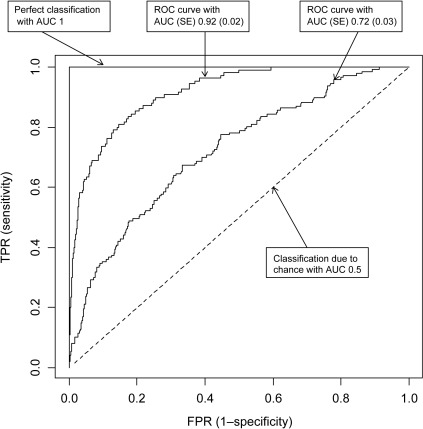

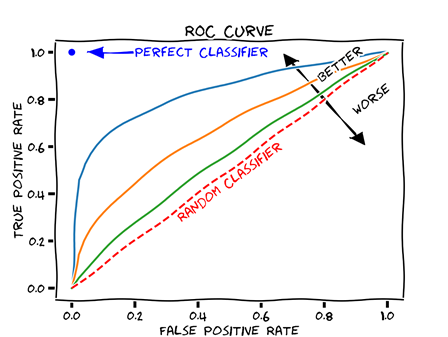

ROC plots can also be used to judge feature importances. Prepare a model with a subset or a group of related  features and prepare another model with another group of related features. Compare AUC in the two cases.

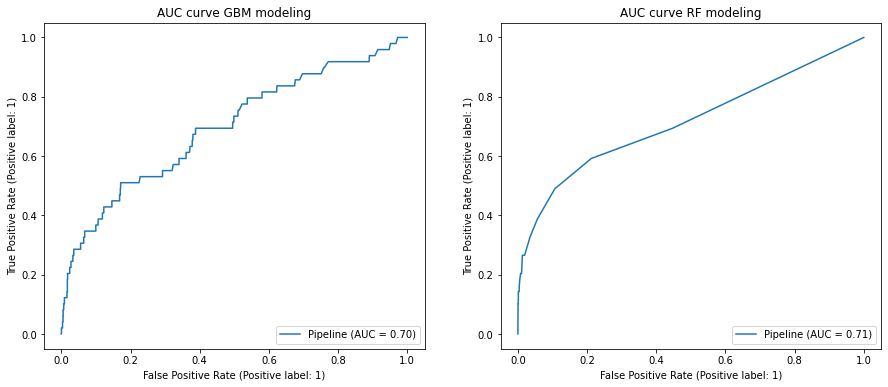

In [17]:
# 10.2 Plot both ROC curves on the same axes
#       Positive label is always 1 in these plots

fig,ax = plt.subplots(1,2, figsize = (15,6))

# 10.3 ROC curve for GBM modleing
_=plot_roc_curve(
                  pipe3,            # Estimator instance
                  X_test, y_test,
                  response_method = 'auto',  # Default target response: predict_proba
                  ax =ax[0]
                )


# 10.4 ROC curve for RF modeling
_=plot_roc_curve(
                  pipe4,
                  X_test, y_test,
                  response_method = 'auto',
                  ax =ax[1]
               )

# 10.5 Titles
_=ax[0].set_title("AUC curve GBM modeling")
_=ax[1].set_title("AUC curve RF modeling")


#### Precision-Recall curve

A PR curve is simply a graph with Precision values on the y-axis and Recall values on the x-axis. In other words, the PR curve contains `TP/(TP+FN)` on the y-axis and `TP/(TP+FP)` on the x-axis.

>  It is important to note that Precision is also called the `Positive Predictive Value (PPV)`.<br>

>  Recall is also called `Sensitivity`, Hit Rate or `True Positive Rate (TPR)`.

A good PR curve has greater AUC (area under curve).

#### PR curve vs ROC

ROC Curves summarize the trade-off between the True Positive Rate and False Positive Rate using different probability thresholds.

Precision-Recall curves summarize the trade-off between the Positive predictive value (ie precision)and True Positive Rate (ie recall) using different probability thresholds.

ROC curves are appropriate when the target class is balanced, whereas Precision-Recall curves are suitable for imbalanced datasets.

[Here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/) is a good article for deeper understanding. Also see StackOverflow [here](https://stackoverflow.com/a/59527790). A PR-curve looks like as follows:

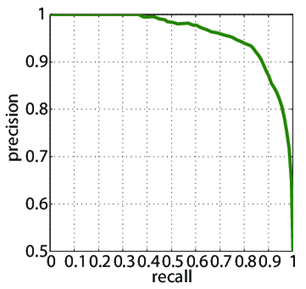

Another way to look at PR-curve is as below. Threshold can be absolute of probability threshold.

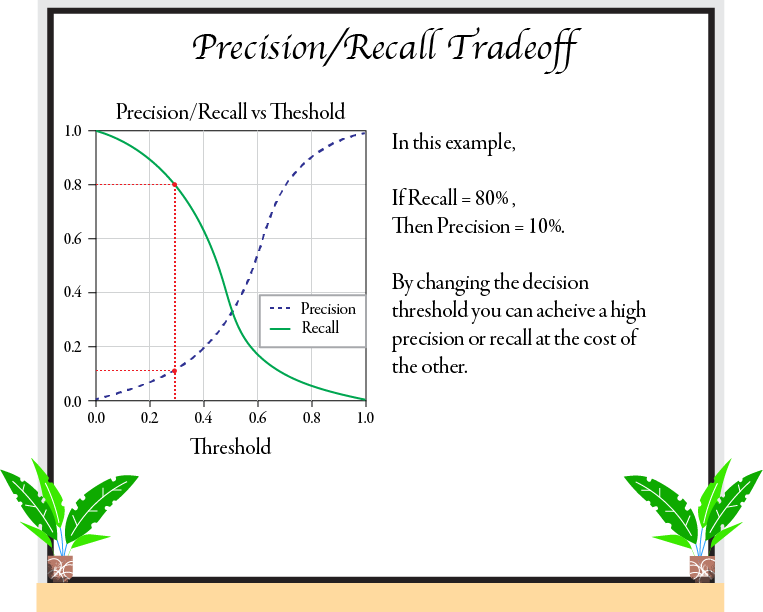

#### Which is more important? High precision or high recall?

High Recall<br>
> At airport security recall has higher importance.  When there is something that is a security threat at the airport, we would hope that a very high proportion of those threats are caught. <br>

> If you trained a classifier to detect fraudulent credit card activity, it wouldn’t be that big of a deal if your classifier has a low precision as long as it has a really high recall (meaning there might be a few false alarms, but almost all fraudulent activity will be detected).


High Precision<br>
> Similarly If a classifier is trying to detect safe websites for a child (where a safe site is considered the positive class), then we would want high precision where our predictions of what is safe is very high. We don’t want any unsafe sites not getting blocked.<br>

>On the other hand, if you train a classifier that detects if a mushroom in nature is edible (not poisonous). You would probably prefer a classifier that you can trust when it predicts a mushroom is edible (high precision) but misclassifies some edible mushrooms as poisonous (low recall), rather than a classifier that misclassifies poisonous mushrooms as edible.


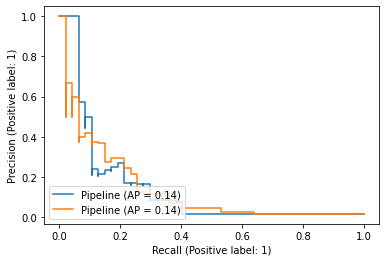

In [ ]:
# 11.0 Plot precision recall curves
#       Positive label is always 1 in these plots
fig = plt.figure()
ax = fig.subplots()
_=plot_precision_recall_curve(pipe3,  X_test, y_test, ax =ax)
_=plot_precision_recall_curve(pipe4, X_test, y_test, ax =ax)
plt.show()

In [ ]:
##### I am done ############